In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget

In [2]:
# Read in data and set nan's to zero
starlink_data = np.load("starlink_data.npy")
starlink_data = np.nan_to_num(starlink_data, nan = 0)
print(starlink_data.shape)

(1984, 8018, 10)


In [3]:
sat_ind = np.arange(0,starlink_data.shape[0])
time_ind = 1

time = starlink_data[sat_ind, ::time_ind, 0]
time = (time - 2022*10**9) *10**-6
time = time - time[:,0:1]

angular_momentum_x = starlink_data[sat_ind, ::time_ind, 7]
angular_momentum_y = starlink_data[sat_ind, ::time_ind, 8]
angular_momentum_z = starlink_data[sat_ind, ::time_ind, 9]

position = starlink_data[ :, ::time_ind,1:4]
radius = np.linalg.norm(position,axis =2)

In [4]:
def plot_time_clusters(num_clusters, data,time,clusters,ax):
    '''
    plots each cluster separately with its mean for a given 
    '''
    for i in range(0,num_clusters):
        title = "Cluster" + str(i)
        # calculates the mean position and time between each satellite
        radius_mean = np.mean(data[clusters==i,:],axis =0)
        time_mean = np.mean(time[clusters==i,:],axis =0)
        # scatter plots each satellites value as a function of time
        ax[i].scatter(time[clusters==i,:],data[clusters==i,:],color = "blue",s =1)
        ax[i].plot(time_mean,radius_mean,color = "red")
        ax[i].set_title(title)
        ax[i].set_ylim([np.min(data[clusters==i,:])-50, np.max(data[clusters==i,:])+50])

ValueError: could not convert string to float: ''

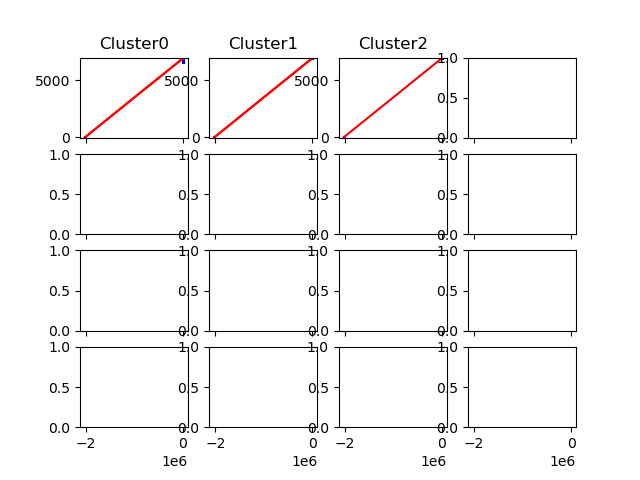

In [12]:
amount_labels = 33
labels =np.zeros(amount_labels)
sat_ind = np.random.choice(starlink_data.shape[0],amount_labels)
plt.figure(1)
fig,ax =plt.subplots(nrows = 4,ncols=4, sharex = True)
ax = ax.ravel()
j=0
for i in sat_ind:
    num_clusters = np.unique(labels).shape[0]
    if num_clusters >1:
        plot_time_clusters(num_clusters, radius[sat_ind,:],time[sat_ind,:], labels, ax)
        plt.draw
    plt.figure(2)
    plt.plot(time[i,:],radius[i,:])
    plt.draw
    labels[j] = input('Give a Cluster Number:')
    j+=1